# Tratamento dos dados

In [29]:
import os

def limpar_arquivo_csv_no_lugar(caminho_arquivo):
    """
    Lê um arquivo CSV, remove as linhas que contêm ';;;;', 
    e salva as alterações no próprio arquivo. (Função anterior)
    """
    try:
        linhas_validas = []
        with open(caminho_arquivo, 'r', encoding='utf-8') as f:
            for linha in f:
                if ';;;;' not in linha:
                    linhas_validas.append(linha)
        
        total_original = sum(1 for line in open(caminho_arquivo, 'r'))
        linhas_removidas = total_original - len(linhas_validas)

        # Apenas reescreve o arquivo se houver linhas a serem removidas
        if linhas_removidas > 0:
            with open(caminho_arquivo, 'w', encoding='utf-8') as f:
                f.writelines(linhas_validas)
            print(f" -> Arquivo limpo: '{os.path.basename(caminho_arquivo)}' ({linhas_removidas} linhas removidas).")
            return True # Retorna True se o arquivo foi modificado
        else:
            print(f" -> Arquivo já estava limpo: '{os.path.basename(caminho_arquivo)}'.")
            return False # Retorna False se nada foi alterado
            
    except Exception as e:
        print(f" -> Erro ao processar o arquivo '{os.path.basename(caminho_arquivo)}': {e}")
        return False

def limpar_arquivos_na_pasta(caminho_da_pasta):
    """
    Verifica uma pasta e aplica a função de limpeza em todos os arquivos
    .csv que começam com 'Medida'.
    """
    print(f"Iniciando a limpeza na pasta: '{caminho_da_pasta}'\n")
    
    # Verifica se o caminho fornecido é realmente uma pasta
    if not os.path.isdir(caminho_da_pasta):
        print(f"Erro: O caminho '{caminho_da_pasta}' não é uma pasta válida.")
        return

    arquivos_modificados = 0
    arquivos_encontrados = 0
    
    # Itera sobre todos os itens na pasta
    for nome_arquivo in os.listdir(caminho_da_pasta):
        # Verifica se o item corresponde aos critérios
        if nome_arquivo.startswith('Medida') and nome_arquivo.endswith('.csv'):
            arquivos_encontrados += 1
            # Cria o caminho completo para o arquivo
            caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)
            
            # Chama a função de limpeza para o arquivo
            if limpar_arquivo_csv_no_lugar(caminho_completo):
                arquivos_modificados += 1
    
    print("\n--- Resumo da Operação ---")
    if arquivos_encontrados == 0:
        print("Nenhum arquivo .csv começando com 'Medida' foi encontrado na pasta.")
    else:
        print(f"Total de arquivos encontrados: {arquivos_encontrados}")
        print(f"Total de arquivos modificados: {arquivos_modificados}")
    print("--------------------------")

# --- MODO DE USAR ---
# Por favor, substitua "COLOQUE_O_ENDERECO_DA_SUA_PASTA_AQUI" pelo caminho real da sua pasta.
# Exemplo para Windows: "C:\\Users\\SeuUsuario\\Desktop\\Meus_Dados"
# Exemplo para Mac/Linux: "/home/seu_usuario/documentos/meus_dados"

pasta_alvo = "Medidas 18.09.2025"

# Chama a função principal para iniciar o processo
limpar_arquivos_na_pasta(pasta_alvo)

Iniciando a limpeza na pasta: 'Medidas 18.09.2025'

 -> Arquivo já estava limpo: 'Medida-1-L.V-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-2-L.A-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-3-L.Vd-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-4-L.Vd-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-5-L.Vd-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-6-L.V.A-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-7-L.A.Vd-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-8-L.V.Vd-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-9-L.V.A.Vd-18.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-10-L.Vd2-25.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-11-L.Vd2-25.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-12-L.Vd2-25.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-13-L.Vd2-25.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-14-L.Vd2-25.09.2025.csv'.
 -> Arquivo já estava limpo: 'Medida-15-L.Vd2-25.09.2025.csv'.
 -> Arquivo já

In [ ]:
import os

def formatar_arquivo_csv(caminho_entrada, caminho_saida):
    """
    Converte um arquivo CSV para um formato padrão: troca vírgulas por pontos,
    ajusta a coluna de números complexos e usa '  ' como separador de colunas.
    """
    try:
        with open(caminho_entrada, 'r', encoding='utf-8') as f_entrada, \
             open(caminho_saida, 'w', encoding='utf-8') as f_saida:
            
            for linha in f_entrada:
                if not linha.strip() or ';;;;' in linha:
                    continue
                
                # O arquivo de entrada ainda é lido com ';'
                colunas = linha.strip().split(';')
                colunas_formatadas = []
                for i, valor in enumerate(colunas):
                    if i == 2:
                        valor_formatado = valor.replace(',', '.').replace('i', 'j')
                        colunas_formatadas.append(valor_formatado)
                    else:
                        valor_formatado = valor.replace(',', '.')
                        colunas_formatadas.append(valor_formatado)
                
                # ALTERAÇÃO: O separador de colunas no arquivo de saída agora é '  '
                f_saida.write('  '.join(colunas_formatadas) + '\n')
        
        return True

    except Exception as e:
        print(f" -> Erro ao processar o arquivo '{os.path.basename(caminho_entrada)}': {e}")
        return False

def formatar_arquivos_na_pasta(caminho_da_pasta):
    """
    Verifica uma pasta e aplica a formatação em todos os arquivos
    .csv que começam com 'Medida', ignorando os que já foram formatados.
    """
    print(f"Iniciando a formatação na pasta: '{caminho_da_pasta}'\n")
    
    if not os.path.isdir(caminho_da_pasta):
        print(f"Erro: O caminho '{caminho_da_pasta}' não é uma pasta válida.")
        return

    arquivos_formatados = 0
    arquivos_encontrados = 0
    arquivos_ignorados = 0
    
    for nome_arquivo in os.listdir(caminho_da_pasta):
        if nome_arquivo.startswith('Medida') and nome_arquivo.endswith('.csv'):
            if '_formatado' in nome_arquivo:
                arquivos_ignorados += 1
                continue

            arquivos_encontrados += 1
            caminho_completo_entrada = os.path.join(caminho_da_pasta, nome_arquivo)
            
            nome_base, extensao = os.path.splitext(nome_arquivo)
            caminho_completo_saida = os.path.join(caminho_da_pasta, f"{nome_base}_formatado{extensao}")
            
            print(f"Processando '{nome_arquivo}'...")
            if formatar_arquivo_csv(caminho_completo_entrada, caminho_completo_saida):
                arquivos_formatados += 1
                print(f" -> Salvo como '{os.path.basename(caminho_completo_saida)}'")
    
    print("\n--- Resumo da Operação ---")
    if arquivos_encontrados == 0 and arquivos_ignorados == 0:
        print("Nenhum arquivo .csv começando com 'Medida' foi encontrado.")
    else:
        print(f"Total de arquivos .csv 'Medida' encontrados: {arquivos_encontrados + arquivos_ignorados}")
        print(f"Arquivos a formatar: {arquivos_encontrados}")
        print(f"Arquivos ignorados (já formatados): {arquivos_ignorados}")
        print(f"Novos arquivos formatados com sucesso: {arquivos_formatados}")
    print("--------------------------")


# --- MODO DE USAR ---
# Por favor, substitua "COLOQUE_O_ENDERECO_DA_SUA_PASTA_AQUI" pelo caminho real da sua pasta.
pasta_alvo = "Medidas 18.09.2025"

# Chama a função principal para iniciar o processo
formatar_arquivos_na_pasta(pasta_alvo)

Iniciando a formatação na pasta: 'Medidas 18.09.2025'

Processando 'Medida-1-L.V-18.09.2025.csv'...
 -> Salvo como 'Medida-1-L.V-18.09.2025_formatado.csv'
Processando 'Medida-2-L.A-18.09.2025.csv'...
 -> Salvo como 'Medida-2-L.A-18.09.2025_formatado.csv'
Processando 'Medida-3-L.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-3-L.Vd-18.09.2025_formatado.csv'
Processando 'Medida-4-L.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-4-L.Vd-18.09.2025_formatado.csv'
Processando 'Medida-5-L.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-5-L.Vd-18.09.2025_formatado.csv'
Processando 'Medida-6-L.V.A-18.09.2025.csv'...
 -> Salvo como 'Medida-6-L.V.A-18.09.2025_formatado.csv'
Processando 'Medida-7-L.A.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-7-L.A.Vd-18.09.2025_formatado.csv'
Processando 'Medida-8-L.V.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-8-L.V.Vd-18.09.2025_formatado.csv'
Processando 'Medida-9-L.V.A.Vd-18.09.2025.csv'...
 -> Salvo como 'Medida-9-L.V.A.Vd-18.09.2025_formatado.csv'
Processando '

# Plots

In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import os

# def gerar_interferograma(caminho_do_arquivo):
#     """
#     Lê um arquivo CSV de dados de interferometria e gera um gráfico do interferograma.

#     A imagem do gráfico é salva com o mesmo nome do arquivo original,
#     com o sufixo '-interferograma.png'.

#     Args:
#         caminho_do_arquivo (str): O caminho completo para o arquivo CSV de entrada.
#     """
#     try:
#         # Carrega os dados do arquivo CSV
#         df = pd.read_csv(caminho_do_arquivo, sep=';', header=None)
        
#         # Renomeia as colunas para clareza
#         df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']

#         # Gera o gráfico do Interferograma (Sinal Original)
#         plt.figure(figsize=(12, 7))
#         plt.plot(df['ponto'], df['sinal'])
#         plt.title(f'Interferograma - {os.path.basename(caminho_do_arquivo)}')
#         plt.xlabel('Ponto')
#         plt.xlim(3000,3500)
#         plt.ylabel('Intensidade do Sinal')
#         plt.grid(True)
        
#         # --- Criação dinâmica do nome do arquivo de saída ---
#         # Pega o nome do arquivo sem a extensão .csv
#         nome_base = os.path.splitext(os.path.basename(caminho_do_arquivo))[0]
#         # Adiciona o sufixo e a nova extensão .png
#         nome_saida = f"{nome_base}-interferograma.png"
        
#         # Salva o gráfico com o novo nome
#         plt.savefig(nome_saida)
#         # Fecha a figura para liberar memória, bom para usar em loops
#         plt.close()

#         print(f"Gráfico gerado com sucesso e salvo como '{nome_saida}'")

#     except FileNotFoundError:
#         print(f"Erro: O arquivo '{caminho_do_arquivo}' não foi encontrado.")
#     except Exception as e:
#         print(f"Ocorreu um erro ao processar o arquivo '{caminho_do_arquivo}': {e}")



# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.signal import find_peaks
# from matplotlib.ticker import FuncFormatter
# import os

# def wavelength_to_rgba(wavelength, alpha=0.3):
#     """Converte comprimento de onda em nanômetros para uma cor RGBA."""
#     if not (380 <= wavelength <= 750):
#         return (1.0, 1.0, 1.0, 0.0)
#     gamma = 0.8
#     R, G, B = 0, 0, 0
#     if 380 <= wavelength <= 439:
#         R = -(wavelength - 440) / (440 - 380); B = 1.0
#     elif 440 <= wavelength <= 489:
#         G = (wavelength - 440) / (490 - 440); B = 1.0
#     elif 490 <= wavelength <= 509:
#         G = 1.0; B = -(wavelength - 510) / (510 - 490)
#     elif 510 <= wavelength <= 579:
#         R = (wavelength - 510) / (580 - 510); G = 1.0
#     elif 580 <= wavelength <= 644:
#         R = 1.0; G = -(wavelength - 645) / (645 - 580)
#     elif 645 <= wavelength <= 750:
#         R = 1.0

#     factor = 1.0
#     if 380 <= wavelength <= 419:
#         factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
#     elif 645 <= wavelength <= 750:
#         factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)

#     if R != 0: R = (R * factor) ** gamma
#     if G != 0: G = (G * factor) ** gamma
#     if B != 0: B = (B * factor) ** gamma
#     return (R, G, B, alpha)

# def gerar_espectro_com_picos(caminho_do_arquivo):
#     """
#     Lê um arquivo de espectro, analisa os picos dominantes e gera um gráfico.

#     A imagem do gráfico é salva com o mesmo nome do arquivo original,
#     com o sufixo '-espectro.png'.
    
#     Args:
#         caminho_do_arquivo (str): O caminho para o arquivo CSV formatado.
#     """
#     try:
#         # Criação dinâmica do nome do arquivo de saída
#         nome_base = os.path.splitext(os.path.basename(caminho_do_arquivo))[0]
#         nome_saida = f"{nome_base}-espectro.png"

#         df = pd.read_csv(caminho_do_arquivo, sep=';', header=None)
#         df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']
#         df_positivo = df[(df['lambda'] >= 0) & (df['lambda'] <= 1500)].copy()
        
#         # Normalização
#         max_val = df_positivo['ft_abs'].max()
#         min_val = df_positivo['ft_abs'].min()
#         df_positivo['ft_abs_norm'] = (df_positivo['ft_abs'] - min_val) / (max_val - min_val)
        
#         # Lógica de detecção de picos
#         df_analise = df_positivo[df_positivo['lambda'] >= 200].copy()
#         max_intensity = df_analise['ft_abs_norm'].max()
#         min_height = max_intensity * 0.5
#         candidate_indices, _ = find_peaks(df_analise['ft_abs_norm'], height=min_height)
#         candidate_peaks = df_analise.iloc[candidate_indices]
        
#         selected_peaks_list = []
#         for idx, peak in candidate_peaks.iterrows():
#             is_dominated = any(
#                 (other_peak['ft_abs_norm'] > peak['ft_abs_norm']) and 
#                 (abs(other_peak['lambda'] - peak['lambda']) < 50)
#                 for _, other_peak in candidate_peaks.iterrows()
#             )
#             if not is_dominated:
#                 selected_peaks_list.append(peak)

#         if not selected_peaks_list:
#             print(f"Aviso: Nenhum pico dominante encontrado para '{os.path.basename(caminho_do_arquivo)}'.")
#             return
        
#         selected_peaks_df = pd.DataFrame(selected_peaks_list).sort_values(by='ft_abs_norm', ascending=False)
#         selected_peaks = list(zip(selected_peaks_df['lambda'], selected_peaks_df['ft_abs_norm']))
        
#         # Plotagem
#         fig, ax = plt.subplots(figsize=(14, 7))
#         wavelengths = np.arange(100, 1501)
#         colors = [wavelength_to_rgba(w, alpha=0.3) for w in wavelengths]
#         spectrum = np.array(colors).reshape(1, -1, 4)
#         ax.imshow(spectrum, aspect='auto', extent=[100, 1500, 0, 1.1])
        
#         ax.plot(df_positivo['lambda'], df_positivo['ft_abs_norm'], 
#                 color='black', linewidth=1, marker='o', markersize=2)

#         for i, (w, v) in enumerate(selected_peaks):
#             ax.scatter(w, v, 
#                        color='red' if i == 0 else 'blue',
#                        s=50, zorder=3,
#                        label=f"{w:.1f} nm")

#         peak_wavelengths = [w for w, v in selected_peaks]
#         xticks = list(ax.get_xticks())
#         xticks = [t for t in xticks if all(abs(t - w) > 50 for w in peak_wavelengths)]
#         xticks.extend(peak_wavelengths)
#         xticks = sorted(list(set(xticks)))
#         ax.set_xticks(xticks)

#         def bold_formatter(x, pos):
#             for w in peak_wavelengths:
#                 if abs(x - w) < 1e-6:
#                     return r"$\bf{" + f"{x:.1f}" + "}$"
#             return f"{x:.0f}"
#         ax.xaxis.set_major_formatter(FuncFormatter(bold_formatter))

#         ax.set_title(f'Espectro - {os.path.basename(caminho_do_arquivo)}')
#         ax.set_xlabel('Comprimento de Onda (Lambda)')
#         ax.set_ylabel('Intensidade Normalizada (Min-Max)')
#         ax.set_xlim(100, 1500)
#         ax.set_ylim(0, 1.1)
#         ax.grid(True, linestyle='--', color='black', alpha=0.4)
#         ax.legend()
        
#         plt.tight_layout()
#         plt.savefig(nome_saida)
#         plt.show()
#         plt.close(fig)

#         print(f"Gráfico de espectro gerado com sucesso e salvo como '{nome_saida}'")
#         print("Picos Dominantes Encontrados:")
#         for w, v in selected_peaks:
#             print(f" - Pico em: λ = {w:.2f} nm (Intensidade Normalizada = {v:.3f})")

#     except FileNotFoundError:
#         print(f"Erro: O arquivo '{caminho_do_arquivo}' não foi encontrado.")
#     except Exception as e:
#         print(f"Ocorreu um erro ao processar '{caminho_do_arquivo}': {e}")


# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np
# import os

# def gerar_interferograma_varredura(caminho_do_arquivo, window_size=200, fps=5):
#     """
#     Gera uma animação de varredura (janela deslizante) de um interferograma.

#     A animação é salva como um arquivo MP4 com o mesmo nome do arquivo original,
#     com o sufixo '-interferograma_varredura.mp4'.

#     Args:
#         caminho_do_arquivo (str): O caminho para o arquivo CSV de entrada.
#         window_size (int): O número de pontos a serem exibidos em cada quadro.
#         fps (int): Os quadros por segundo do vídeo de saída.
#     """
#     try:
#         # Criação dinâmica do nome do arquivo de saída
#         nome_base = os.path.splitext(os.path.basename(caminho_do_arquivo))[0]
#         nome_saida = f"{nome_base}-interferograma_varredura.mp4"

#         # Carrega os dados do arquivo CSV
#         # Tenta ler com decimal ',', se falhar, tenta sem (para arquivos já formatados)
#         # try:
#         #     df = pd.read_csv(caminho_do_arquivo, sep=';', decimal=',', header=None)
#         # except ValueError:
#         df = pd.read_csv(caminho_do_arquivo, sep=';', header=None)
            
#         df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']

#         # Configuração inicial do gráfico
#         fig, ax = plt.subplots(figsize=(12, 7))
#         line, = ax.plot([], [], lw=2)
        
#         ax.grid(True)
#         ax.set_ylim((df['sinal'].min() - 0.1 * abs(df['sinal'].min())), df['sinal'].max() + 0.1 * abs(df['sinal'].max()))
        
#         ax.set_xlabel('Ponto')
#         ax.set_ylabel('Intensidade do Sinal')
#         title = ax.set_title(f'Interferograma - {os.path.basename(caminho_do_arquivo)}')

#         max_point = df['ponto'].max()
#         num_frames = int(np.floor(max_point / window_size))

#         def init():
#             line.set_data([], [])
#             ax.set_xlim(0, window_size)
#             return line,

#         def update(frame):
#             x_start = frame * window_size
#             x_end = (frame + 1) * window_size
#             mask = (df['ponto'] >= x_start) & (df['ponto'] < x_end)
#             line.set_data(df.loc[mask, 'ponto'], df.loc[mask, 'sinal'])
#             ax.set_xlim(x_start, x_end)
#             title.set_text(f'Interferograma - Varredura nos Pontos {x_start} a {x_end}')
#             return line, title

#         ani = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

#         print(f"Gerando animação para '{os.path.basename(caminho_do_arquivo)}'...")
#         ani.save(nome_saida, writer='ffmpeg', fps=fps)
#         plt.close(fig) # Fecha a figura para liberar memória
#         print(f"Animação salva com sucesso como '{nome_saida}'")

#     except FileNotFoundError:
#         print(f"Erro: O arquivo '{caminho_do_arquivo}' não foi encontrado.")
#     except Exception as e:
#         print(f"Ocorreu um erro inesperado ao processar '{caminho_do_arquivo}': {e}")


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from matplotlib.ticker import FuncFormatter
import matplotlib.animation as animation
import os

# --- FUNÇÃO AUXILIAR PARA GERAR TÍTULOS DINAMICAMENTE ---
def gerar_titulo_dinamico(caminho_do_arquivo, prefixo):
    """
    Gera um título dinâmico para o gráfico com base no nome do arquivo.
    Ex: 'Medida-8-L.V.Vd-...' -> 'Espectro Laser Vermelho-Verde'
    """
    mapa_cores = {
        'Vd': 'Verde',
        'V': 'Vermelho',
        'A': 'Amarelo',
        'Vd2': 'Verde 2'
    }
    try:
        nome_arquivo = os.path.basename(caminho_do_arquivo)
        # Extrai a parte com os códigos dos lasers (ex: "V.Vd" ou "Vd2.A")
        codigos_str = nome_arquivo.split('-L.')[1].split('-')[0]
        codigos_lista = codigos_str.split('.')
        # Traduz os códigos para nomes de cores
        cores_traduzidas = [mapa_cores.get(codigo, codigo) for codigo in codigos_lista]
        # Junta os nomes das cores com hífens
        titulo_cores = '-'.join(cores_traduzidas)
        return f"{prefixo} Laser {titulo_cores}"
    except (IndexError, AttributeError):
        # Se o nome do arquivo não seguir o padrão, retorna um título genérico
        return f"{prefixo} - {os.path.basename(caminho_do_arquivo)}"


# --- SEU CÓDIGO ORIGINAL 1 (MODIFICADO) ---
def gerar_interferograma(caminho_do_arquivo):
    """
    Lê um arquivo CSV e gera um gráfico do interferograma.
    """
    try:
        df = pd.read_csv(caminho_do_arquivo, sep='	', header=None)
        df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']

        plt.figure(figsize=(12, 7))
        plt.plot(df['ponto'], df['sinal'])
        
        # Título dinâmico
        titulo = gerar_titulo_dinamico(caminho_do_arquivo, prefixo="Interferograma")
        plt.title(titulo)
        
        plt.xlabel('Ponto')
        plt.xlim(3000, 3500) # Mantido conforme seu código original
        plt.ylabel('Intensidade do Sinal')
        plt.grid(True)
        
        nome_base = os.path.splitext(os.path.basename(caminho_do_arquivo))[0]
        nome_saida = f"{nome_base}-interferograma.png"
        
        plt.savefig(nome_saida)
        plt.show()
        plt.close()

        print(f"Gráfico gerado com sucesso e salvo como '{nome_saida}'")

    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_do_arquivo}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro ao processar o arquivo '{caminho_do_arquivo}': {e}")


# --- SEU CÓDIGO ORIGINAL 2 (MODIFICADO) ---
def wavelength_to_rgba(wavelength, alpha=0.3):
    """Converte comprimento de onda em nanômetros para uma cor RGBA."""
    if not (380 <= wavelength <= 750):
        return (1.0, 1.0, 1.0, 0.0)
    gamma = 0.8; R, G, B = 0, 0, 0
    if 380 <= wavelength <= 439: R = -(wavelength - 440) / (440 - 380); B = 1.0
    elif 440 <= wavelength <= 489: G = (wavelength - 440) / (490 - 440); B = 1.0
    elif 490 <= wavelength <= 509: G = 1.0; B = -(wavelength - 510) / (510 - 490)
    elif 510 <= wavelength <= 579: R = (wavelength - 510) / (580 - 510); G = 1.0
    elif 580 <= wavelength <= 644: R = 1.0; G = -(wavelength - 645) / (645 - 580)
    elif 645 <= wavelength <= 750: R = 1.0
    factor = 1.0
    if 380 <= wavelength <= 419: factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif 645 <= wavelength <= 750: factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
    if R != 0: R = (R * factor) ** gamma
    if G != 0: G = (G * factor) ** gamma
    if B != 0: B = (B * factor) ** gamma
    return (R, G, B, alpha)


In [33]:
def gerar_espectro_com_picos(caminho_do_arquivo):
    """Lê um arquivo de espectro, analisa picos e gera um gráfico."""
    try:
        nome_base = os.path.splitext(os.path.basename(caminho_do_arquivo))[0]
        nome_saida = f"{nome_base}-espectro.png"
        df = pd.read_csv(caminho_do_arquivo, sep='	', header=None)
        df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']
        df_positivo = df[(df['lambda'] >= 0) & (df['lambda'] <= 1500)].copy()
        
        max_val = df_positivo['ft_abs'].max(); min_val = df_positivo['ft_abs'].min()
        df_positivo['ft_abs_norm'] = (df_positivo['ft_abs'] - min_val) / (max_val - min_val)
        
        df_analise = df_positivo[df_positivo['lambda'] >= 200].copy()
        
        # --- LÓGICA DE DETECÇÃO DE PICOS ---
        selected_peaks = []
        # Tenta encontrar picos apenas se houver dados para analisar
        if not df_analise.empty:
            max_intensity = df_analise['ft_abs_norm'].max()
            min_height = max_intensity * 0.5
            candidate_indices, _ = find_peaks(df_analise['ft_abs_norm'], height=min_height)
            
            if len(candidate_indices) > 0:
                candidate_peaks = df_analise.iloc[candidate_indices]
                selected_peaks_list = []
                for idx, peak in candidate_peaks.iterrows():
                    if not any((o['ft_abs_norm'] > peak['ft_abs_norm']) and (abs(o['lambda'] - peak['lambda']) < 50) for _, o in candidate_peaks.iterrows()):
                        selected_peaks_list.append(peak)
                
                if selected_peaks_list:
                    selected_peaks_df = pd.DataFrame(selected_peaks_list).sort_values(by='ft_abs_norm', ascending=False)
                    selected_peaks = list(zip(selected_peaks_df['lambda'], selected_peaks_df['ft_abs_norm']))
        
        # --- PLOTAGEM (executada sempre) ---
        fig, ax = plt.subplots(figsize=(14, 7))
        wavelengths = np.arange(100, 1501); colors = [wavelength_to_rgba(w) for w in wavelengths]
        ax.imshow(np.array(colors).reshape(1, -1, 4), aspect='auto', extent=[100, 1500, 0, 1.1])
        ax.plot(df_positivo['lambda'], df_positivo['ft_abs_norm'], color='black', linewidth=1, marker='o', markersize=2)

        titulo = gerar_titulo_dinamico(caminho_do_arquivo, prefixo="Espectro")
        ax.set_title(titulo)
        ax.set_xlabel('Comprimento de Onda (Lambda)'); ax.set_ylabel('Intensidade Normalizada (Min-Max)')
        ax.set_xlim(100, 1500); ax.set_ylim(0, 1.1); ax.grid(True, linestyle='--', color='black', alpha=0.4)
        
        # --- PLOTAGEM DOS PICOS (executada apenas se picos forem encontrados) ---
        if selected_peaks:
            for i, (w, v) in enumerate(selected_peaks):
                ax.scatter(w, v, color='red' if i == 0 else 'blue', s=50, zorder=3, label=f"{w:.1f} nm")

            peak_wavelengths = [w for w, v in selected_peaks]
            xticks = list(ax.get_xticks()); xticks = [t for t in xticks if all(abs(t - w) > 50 for w in peak_wavelengths)]
            xticks.extend(peak_wavelengths); ax.set_xticks(sorted(list(set(xticks))))

            def bold_formatter(x, pos):
                return r"$\bf{" + f"{x:.1f}" + "}$" if any(abs(x-w)<1e-6 for w in peak_wavelengths) else f"{x:.0f}"
            ax.xaxis.set_major_formatter(FuncFormatter(bold_formatter))
            ax.legend()
            
            print("Picos Dominantes Encontrados:")
            [print(f" - Pico em: λ = {w:.2f} nm") for w, v in selected_peaks]
        else:
            # Se nenhum pico foi encontrado, apenas imprime o aviso
            print(f"Aviso: Nenhum pico dominante encontrado para '{os.path.basename(caminho_do_arquivo)}'.")

        plt.tight_layout(); plt.savefig(nome_saida); plt.show(); plt.close(fig)
        print(f"Gráfico de espectro gerado com sucesso e salvo como '{nome_saida}'")
        
    except Exception as e:
        print(f"Ocorreu um erro ao processar '{caminho_do_arquivo}': {e}")

--- Processando arquivo: Medida-18-L.Vd2-25.09.2025_formatado.csv ---


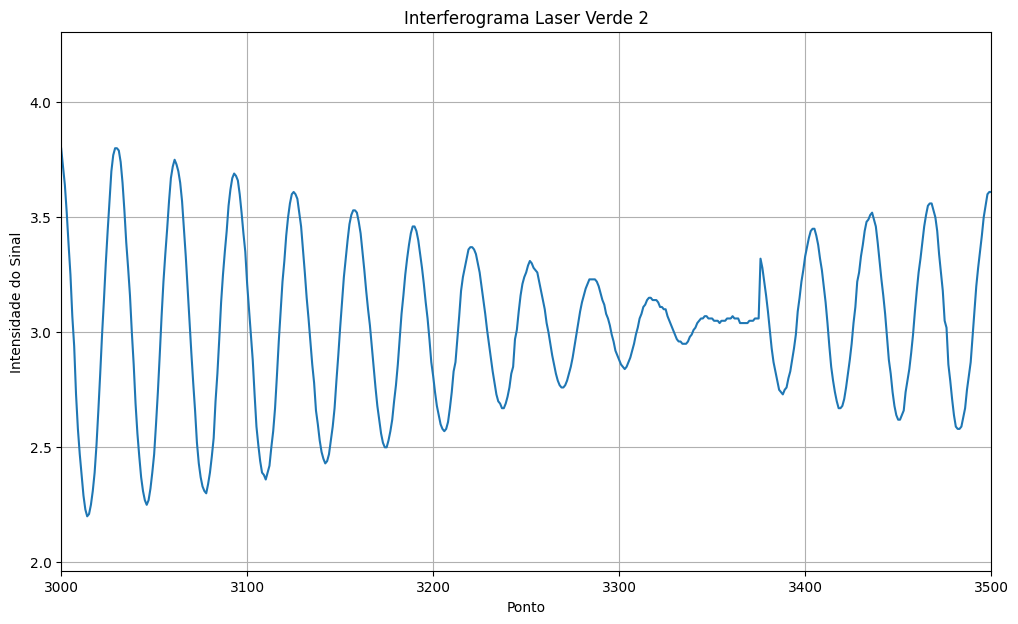

Gráfico gerado com sucesso e salvo como 'Medida-18-L.Vd2-25.09.2025_formatado-interferograma.png'
Picos Dominantes Encontrados:
 - Pico em: λ = 1063.65 nm


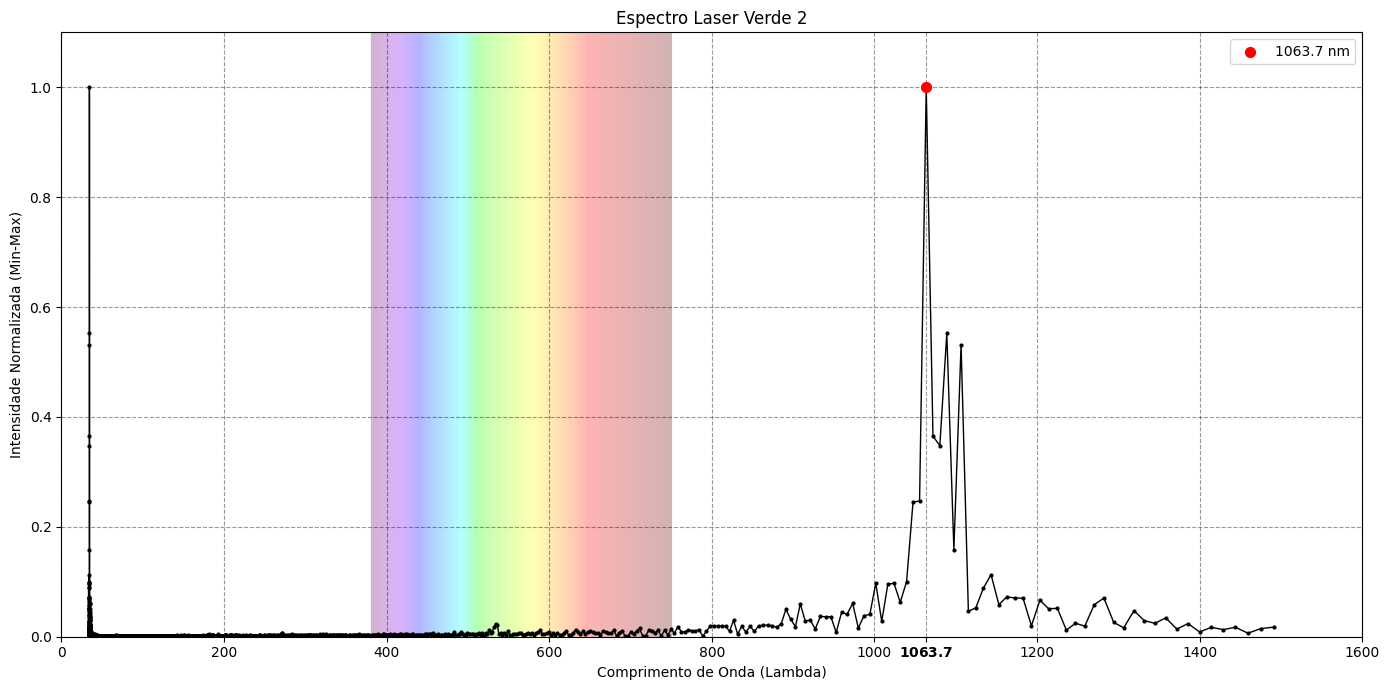

Gráfico de espectro gerado com sucesso e salvo como 'Medida-18-L.Vd2-25.09.2025_formatado-espectro.png'
Gerando animação para 'Medida-18-L.Vd2-25.09.2025_formatado.csv'...
Animação salva com sucesso como 'Medida-18-L.Vd2-25.09.2025_formatado-interferograma_varredura.mp4'


In [34]:


# --- SEU CÓDIGO ORIGINAL 3 (MODIFICADO) ---
def gerar_interferograma_varredura(caminho_do_arquivo, window_size=200, fps=5):
    """Gera uma animação de varredura de um interferograma."""
    try:
        nome_base = os.path.splitext(os.path.basename(caminho_do_arquivo))[0]
        nome_saida = f"{nome_base}-interferograma_varredura.mp4"
        df = pd.read_csv(caminho_do_arquivo, sep='	', header=None)
        df.columns = ['ponto', 'sinal', 'ft_complex', 'lambda', 'ft_abs']

        fig, ax = plt.subplots(figsize=(12, 7))
        line, = ax.plot([], [], lw=2)
        ax.grid(True); ax.set_ylim((df['sinal'].min() - 0.1*abs(df['sinal'].min())), df['sinal'].max() + 0.1*abs(df['sinal'].max()))
        ax.set_xlabel('Ponto'); ax.set_ylabel('Intensidade do Sinal')
        
        # Título dinâmico (base)
        titulo_base = gerar_titulo_dinamico(caminho_do_arquivo, prefixo="Interferograma")
        title = ax.set_title(titulo_base)

        max_point = df['ponto'].max(); num_frames = int(np.floor(max_point / window_size))

        def init():
            line.set_data([], []); ax.set_xlim(0, window_size)
            return line,
        def update(frame):
            x_start = frame * window_size; x_end = (frame + 1) * window_size
            mask = (df['ponto'] >= x_start) & (df['ponto'] < x_end)
            line.set_data(df.loc[mask, 'ponto'], df.loc[mask, 'sinal'])
            ax.set_xlim(x_start, x_end)
            # Título dinâmico que se atualiza
            title.set_text(f'{titulo_base} | Varredura: {x_start} a {x_end}')
            return line, title

        ani = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)
        print(f"Gerando animação para '{os.path.basename(caminho_do_arquivo)}'...");
        ani.save(nome_saida, writer='ffmpeg', fps=fps); plt.close(fig)
        print(f"Animação salva com sucesso como '{nome_saida}'")
    except Exception as e:
        print(f"Ocorreu um erro ao processar '{caminho_do_arquivo}': {e}")


# --- MODO DE USAR (Exemplo) ---
# Basta chamar a função com o caminho do arquivo que você quer processar.
arquivo = 'Medidas 18.09.2025/Medida-18-L.Vd2-25.09.2025_formatado.csv'

print(f"--- Processando arquivo: {os.path.basename(arquivo)} ---")
gerar_interferograma(arquivo)
gerar_espectro_com_picos(arquivo)
gerar_interferograma_varredura(arquivo, window_size=200, fps=5)


In [35]:
# import os

# pasta = 'Medidas 18.09.2025/'

# # Percorre todos os arquivos da pasta
# for arquivo in os.listdir(pasta):
#     if "_formatado" in arquivo:  # verifica se o nome do arquivo contém "_formatado"
#         caminho_arquivo = os.path.join(pasta, arquivo)

#         if os.path.isfile(caminho_arquivo):  # garante que é um arquivo
#             print(f"--- Processando arquivo: {arquivo} ---")
#             gerar_interferograma(caminho_arquivo)
#             gerar_espectro_com_picos(caminho_arquivo)
#             gerar_interferograma_varredura(caminho_arquivo, window_size=200, fps=5)
